In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
%matplotlib inline
import warnings 
warnings.filterwarnings(action='ignore')


## 데이터 다운로드

In [3]:
df_movies =  pd.read_csv('movies.csv')
df_ratings = pd.read_csv('ratings.csv')

In [4]:
df_movies.head() # 영화 id에 따른 영화제목과 장르

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings.head() # user가 평가한 영화 점수

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


## 영화제목과 id로 dictionary 생성

In [6]:
movieId_to_name = pd.Series(df_movies.title.values, index = df_movies.movieId.values).to_dict()
movieId_to_name
len(movieId_to_name)

27278

In [11]:
movieId_to_name[1]

'Toy Story (1995)'

In [13]:
name_to_movieId = pd.Series(df_movies.movieId.values, index = df_movies.title).to_dict()
name_to_movieId
len(name_to_movieId)

27262

In [14]:
name_to_movieId['Toy Story (1995)']

1

## 영화 평점 분포도 확인

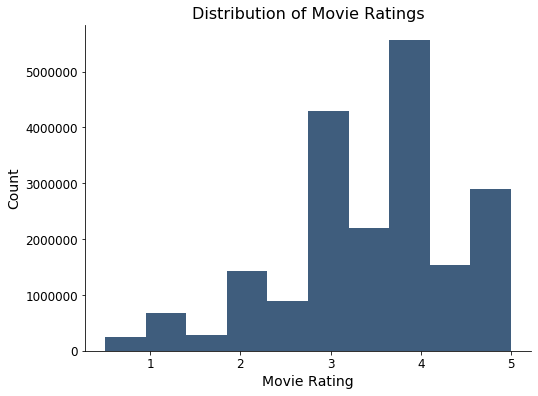

In [15]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set_title("Distribution of Movie Ratings", fontsize=16)
ax.spines["top"].set_visible(False)  # 그래프 오른쪽 라인 보이지 않게
ax.spines["right"].set_visible(False)  # 그래프 왼쪽 라인 보이지 않게

plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
  
plt.xlabel("Movie Rating", fontsize=14)  
plt.ylabel("Count", fontsize=14)  
  
plt.hist(df_ratings['rating'], color="#3F5D7D")  

plt.show()

## train set과 test set 나누기

In [20]:
from sklearn.model_selection import train_test_split

df_ratings_train, df_ratings_test= train_test_split(df_ratings, 
                                                    stratify=df_ratings['userId'],
                                                    random_state = 15688, 
                                                    test_size=0.3)

In [21]:
df_ratings_train

,userId,movieId,rating,timestamp
6188336,42585,2531,3.0,942750609
15821097,109427,2352,4.0,1166543187
17323648,119776,539,4.0,1121124223
114102,775,1375,3.0,1113796177
7738984,53329,4993,5.0,1212654643
...,...,...,...,...
17154272,118658,52281,4.0,1250844614
5635394,38787,1527,4.0,1213881653
16973561,117384,2528,3.5,1199527404
16435934,113782,233,2.0,994171294


In [22]:
df_ratings_test

,userId,movieId,rating,timestamp
4768927,32735,2390,4.0,985193943
3797378,25880,6003,3.0,1174937240
3406085,23223,1873,4.5,1388627366
1742963,11794,2761,4.5,1123779915
7090380,48904,2533,3.0,945568333
...,...,...,...,...
3711620,25270,22,2.0,847063069
6002412,41329,6539,3.5,1231025387
4551846,31158,1259,5.0,978743391
18483458,127954,7147,3.0,1204813898


In [23]:
print("Number of training data: "+str(len(df_ratings_train)))
print("Number of test data: "+str(len(df_ratings_test)))

Number of training data: 14000184
Number of test data: 6000079


## 평점 4점이상이면 1 미만이면 0으로 매핑

In [24]:
df_ratings_train['liked'] = np.where(df_ratings_train['rating']>=4, 1, 0)
df_ratings_train['movieId'] = df_ratings_train['movieId'].astype('str')

In [25]:
df_ratings_train

,userId,movieId,rating,timestamp,liked
6188336,42585,2531,3.0,942750609,0
15821097,109427,2352,4.0,1166543187,1
17323648,119776,539,4.0,1121124223,1
114102,775,1375,3.0,1113796177,0
7738984,53329,4993,5.0,1212654643,1
...,...,...,...,...,...
17154272,118658,52281,4.0,1250844614,1
5635394,38787,1527,4.0,1213881653,1
16973561,117384,2528,3.5,1199527404,0
16435934,113782,233,2.0,994171294,0


## liked와 userid로 그룹핑 하기

In [26]:
gp_user_like = df_ratings_train.groupby(['liked', 'userId'])

In [27]:
gp_user_like

In [16]:
#for gp in gp_user_like.groups:
    #print(gp)


In [28]:
gp_user_like.get_group((0, 1)) # (0,1) = liked가 0이고 userid가 1

,userId,movieId,rating,timestamp,liked
115,1,4105,3.5,1094786104,0
51,1,1304,3.0,1094785720,0
129,1,4941,3.5,1112486007,0
89,1,2761,3.0,1112484759,0
33,1,1201,3.0,1112484642,0
...,...,...,...,...,...
63,1,1848,3.5,1112486032,0
14,1,367,3.5,1112485980,0
47,1,1262,3.5,1112484735,0
4,1,50,3.5,1112484580,0


## 그룹핑한 데이터 바탕으로 movieid 리스트 변환

In [29]:
def rating_splitter(df):
    
    df['liked'] = np.where(df['rating']>=4, 1, 0)
    df['movieId'] = df['movieId'].astype('str')
    gp_user_like = df.groupby(['liked', 'userId'])

    return ([gp_user_like.get_group(gp)['movieId'].tolist() for gp in gp_user_like.groups])

In [30]:
pd.options.mode.chained_assignment = None
splitted_movies = rating_splitter(df_ratings_train)

In [32]:
print(splitted_movies[0]) #(0,1) (0,2) 순으로 movieid 리스트로 나열

['4105', '1304', '4941', '2761', '1201', '29', '1193', '1750', '1291', '5898', '7045', '2648', '2716', '1994', '2692', '5040', '3037', '6834', '8482', '7164', '112', '6502', '6755', '4226', '589', '7001', '2644', '1348', '7449', '4446', '2194', '1584', '3997', '6242', '6807', '2664', '1243', '47', '1080', '4878', '1261', '4980', '5146', '3438', '1009', '2', '1208', '1089', '337', '3476', '653', '1920', '4133', '32', '2253', '1997', '7247', '1350', '1848', '367', '1262', '50', '5679']


## movie_list shuffle로 최종 input 데이터 생성

In [105]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import gensim
assert gensim.models.word2vec.FAST_VERSION > -1

In [106]:
import random

for movie_list in splitted_movies:
    random.shuffle(movie_list)

In [107]:
from gensim.models import Word2Vec
import datetime
start = datetime.datetime.now()

model = Word2Vec(sentences = splitted_movies, # input list
                 iter = 5, # epoch
                 min_count = 10, # 최소 등장 횟수 (최소 10번 이상 등장한 영화만 분석 대상)
                 size = 200, # 은닉층의 차원
                 workers = 4, # threads 
                 sg = 1, # skip-gram으로 학습
                 hs = 0, # negative sampling 적용
                 negative = 5, # negative sampling 참고 데이터 갯수.
                 window = 9999999)

print("Time passed: " + str(datetime.datetime.now()-start))
model.save('item2vec')

Time passed: 1:20:32.389317


### 모델 설명
window size를 최대로 키움으로써, 1번유저에게 4점 미만 점수를 받은 영화들이 같은 window size에 한번에 들어가게 하여,  
같은 의미를 가지게 되고, 4점 이상 점수를 받은 영화들을 같은 의미를 가지게 되는 임베딩 벡터값으로 학습되게 된다.

## 정의한 모델 불러오기

In [34]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

from gensim.models import Word2Vec
model = Word2Vec.load('item2vec')
word_vectors = model.wv

unable to import 'smart_open.gcs', disabling that module


## 토이스토리와 비슷한 선호도를 가진 영화 출력

In [11]:
name_to_movieId['Toy Story (1995)']

1

In [28]:
model.wv.most_similar_cosmul(positive=['1'],negative=None,topn=5)

[('1073', 0.9282249212265015),
 ('364', 0.921668529510498),
 ('1197', 0.921483039855957),
 ('588', 0.920537531375885),
 ('648', 0.9193351864814758)]

In [80]:
w=df_movies['movieId']==1
df_movies[w]

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [189]:
df_movies[df_movies['movieId'].isin([1073,364,1197,588,648])]

,movieId,title,genres
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
640,648,Mission: Impossible (1996),Action|Adventure|Mystery|Thriller
1052,1073,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical
1172,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance


토이스토리와 비슷한 선호를 가진 영화들은 라이온킹, 알라딘, 윌리와 초콜릿 공장 등으로 나타남.
장르를 보면, 토이스토리와 비슷한 장르의 영화가 나타난것을 볼 수 있음

## 아이언맨과 어벤져스를 좋아하는 사람이 좋아할만한 영화 추천

In [12]:
print(name_to_movieId['Iron Man (2008)'])
print(name_to_movieId['Avengers, The (2012)'])

59315
89745


In [218]:
w=df_movies['movieId']==59315
df_movies[w]

,movieId,title,genres
12631,59315,Iron Man (2008),Action|Adventure|Sci-Fi


In [219]:
w=df_movies['movieId']==89745
df_movies[w]

,movieId,title,genres
17874,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX


In [26]:
model.wv.most_similar_cosmul(positive=['59315','89745'],topn=10)

[('72998', 0.8848257660865784),
 ('68358', 0.8839887380599976),
 ('73017', 0.8820669651031494),
 ('77561', 0.8750942945480347),
 ('87232', 0.8638133406639099),
 ('91529', 0.8604227304458618),
 ('76093', 0.8578081727027893),
 ('88125', 0.8553810715675354),
 ('68954', 0.8546872735023499),
 ('78499', 0.8543201684951782)]

In [27]:
df_movies[df_movies['movieId'].isin([72998,68358,73017,77561,87232,91529,76093,88125,68954,78499])]

,movieId,title,genres
13684,68358,Star Trek (2009),Action|Adventure|Sci-Fi|IMAX
13767,68954,Up (2009),Adventure|Animation|Children|Drama
14592,72998,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
14598,73017,Sherlock Holmes (2009),Action|Crime|Mystery|Thriller
15031,76093,How to Train Your Dragon (2010),Adventure|Animation|Children|Fantasy|IMAX
15203,77561,Iron Man 2 (2010),Action|Adventure|Sci-Fi|Thriller|IMAX
15401,78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX
17283,87232,X-Men: First Class (2011),Action|Adventure|Sci-Fi|Thriller|War
17499,88125,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
18312,91529,"Dark Knight Rises, The (2012)",Action|Adventure|Crime|IMAX


아이언맨과 어벤져스를 좋아하는 사람이 좋아할만한 영화로 스타트랙, 아바타, 아이언맨2, 배트맨 다크나이트 등의 영화가 추천되었다. 
장르를 보면 액션, 어드밴쳐,SF에 IMAX가 들어간 영화가 많이 추천 되었으며, 거기에 범죄나 스릴러가 추가된 영화가 추천되었다. 

# 매트릭스를 좋아하지만, 장고:분노의 추적자 영화는 좋아하지 않는 사람에게 영화를 추천

In [15]:
print(name_to_movieId['Matrix, The (1999)'])
print(name_to_movieId['Django Unchained (2012)'])

2571
99114


In [16]:
w=df_movies['movieId']==2571
df_movies[w]

,movieId,title,genres
2486,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [17]:
w=df_movies['movieId']==99114
df_movies[w]

,movieId,title,genres
20124,99114,Django Unchained (2012),Action|Drama|Western


In [32]:
model.wv.most_similar_cosmul(positive=['2571'],negative=['99114'],topn=10)

[('8127', 1.2527965307235718),
 ('43869', 1.248650312423706),
 ('1777', 1.2409919500350952),
 ('2628', 1.2373762130737305),
 ('1580', 1.2372372150421143),
 ('51698', 1.2303200960159302),
 ('2683', 1.2249118089675903),
 ('1210', 1.2213759422302246),
 ('2617', 1.2209192514419556),
 ('1196', 1.2206213474273682)]

In [33]:
df_movies[df_movies['movieId'].isin([8127,43869,1777,2628,1580,51698,2683,1210,2617,1196])]

,movieId,title,genres
1171,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
1184,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
1528,1580,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
1707,1777,"Wedding Singer, The (1998)",Comedy|Romance
2532,2617,"Mummy, The (1999)",Action|Adventure|Comedy|Fantasy|Horror|Thriller
2543,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
2597,2683,Austin Powers: The Spy Who Shagged Me (1999),Action|Adventure|Comedy
7659,8127,"First $20 Million Is Always the Hardest, The (...",Comedy
10843,43869,Curious George (2006),Adventure|Animation|Children|Comedy
11713,51698,"Last Mimzy, The (2007)",Adventure|Children|Sci-Fi


매트릭스를 좋아하지만 장고:분노의 추적자를 좋아하지 않은 사람에게 추천된 영화로는 백만장자프로젝트, 스타워즈, 미이라, 맨인블랙 등이 추천 되었다.  
장르를 보면, 매트릭스의 SF 장르를 유지시키면서 장고의 서부영화 요소를 제외시키고 코미디 장르를 더하며 연산되어 추천된 것으로 보인다.  
본 연구자도 실제로 매트릭스와 함께 맨인블랙과 미이라를 흥미있게 보았다.

## 모델 성능평가

### 학습된 영화 목록 출력

In [36]:
#print(model.wv.vocab.keys())

## user별로 4점이상 점수를 받은 영화를 positive로 2점 이하로 점수를 받은 영화를 negative로 매핑하여 word2vec 임베딩 후, 연산하여 유사도 기반 상위 5개 영화를 추천하였다.

In [38]:
def user_liked_movies_builder(model, df, for_prediction=False):
    df['liked'] = np.where(df['rating']>=4, 1, 0)
    df['movieId'] = df['movieId'].astype('str')
    df_liked = df[df['liked']==1]
    if for_prediction:
        df_liked = df[df['movieId'].isin(model.wv.vocab.keys())]
        
    user_liked_movies = df_liked.groupby('userId').agg({'movieId': lambda x: x.tolist()})['movieId'].to_dict()
    
    return user_liked_movies

In [39]:
def user_unliked_movies_builder(model, df, for_prediction=False):
    df['liked'] = np.where(df['rating']<=2, 1, 0)
    df['movieId'] = df['movieId'].astype('str')
    df_liked = df[df['liked']==1]
    if for_prediction:
        df_liked = df[df['movieId'].isin(model.wv.vocab.keys())]
        
    user_unliked_movies = df_liked.groupby('userId').agg({'movieId': lambda x: x.tolist()})['movieId'].to_dict()
    
    return user_unliked_movies

In [40]:
def scores_at_m (model, user_liked_movies_test, user_liked_movies_training, user_unliked_movies_training, topn=5):
   
    sum_correct = 0
    
    common_users = set(user_liked_movies_test.keys()).intersection(set(user_liked_movies_training.keys()))
    cnt=0
    for userid in common_users:
        current_test_set = set(user_liked_movies_test[userid])
        pred = [pred_result[0] for pred_result in model.wv.most_similar_cosmul(positive = user_liked_movies_training[userid], 
                                                                               negative=user_unliked_movies_training[userid], 
                                                                               topn=topn)]
        sum_correct += len(set(pred).intersection(current_test_set))
        #print(cnt)
        cnt=cnt+1
    precision_at_m = sum_correct/(topn*len(common_users))
    
    return [precision_at_m]

## precision 출력

In [ ]:
pd.options.mode.chained_assignment = None
user_liked_movies_train = user_liked_movies_builder(model, df_ratings_train, for_prediction=True)
user_liked_movies_test = user_liked_movies_builder(model, df_ratings_test)
user_unliked_movies_train = user_unliked_movies_builder(model, df_ratings_train, for_prediction=True)





model = Word2Vec.load('item2vec')
model_score_sg1 = scores_at_m(model, user_liked_movies_test, user_liked_movies_train, user_liked_movies_train)
#del model

In [42]:
print("precision of this model")
print(round(model_score_sg1[0],1))

precision of this model
0.2


user의 선호에 따라 item2vec 기법을 이용해 영화 추천한 결과,통계적으로추천한 영화 10개 중 2개는 실제로 user가 시청한 것을 확인.  
해당 데이터 셋의 경우 90년대 영화부터 00년대 초반까지 time series가 너무 길어 performance가 상대적으로 낮아진 것으로 보임.  
최근에는 user가 본 영화를 대상으로 하는것이 아닌, click에 기반한 추천으로 performance를 높이고 있음.  
또한 user의 선호가 변할 수 있기 때문에 본 연구처럼 전 기간을 대상으로 할 것이 아니라, 적절한 시점에 구매 목록을 cut-off 시켜 구매
목록을 update 해야함